In [29]:
# modules
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
from scipy import stats
import scipy.stats as stats
import matplotlib.patches as mpatches

In [2]:
#data loading
df = pd.read_csv("C:\\Users\\Nehanth\\Desktop\\DSP\\project\\archive\\paysim.csv")

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.shape

(6362620, 11)

In [5]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


<AxesSubplot:ylabel='Frequency'>

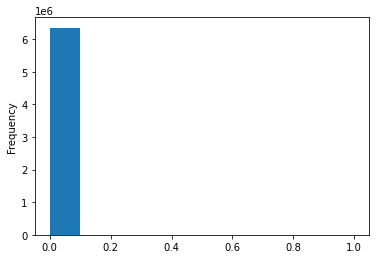

In [8]:
df['isFraud'].plot.hist()

<AxesSubplot:ylabel='Density'>

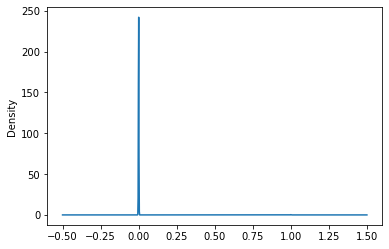

In [9]:
df['isFraud'].plot(kind='density')

In [10]:
df['oldbalanceOrg'].describe()

count    6.362620e+06
mean     8.338831e+05
std      2.888243e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.420800e+04
75%      1.073152e+05
max      5.958504e+07
Name: oldbalanceOrg, dtype: float64

<AxesSubplot:>

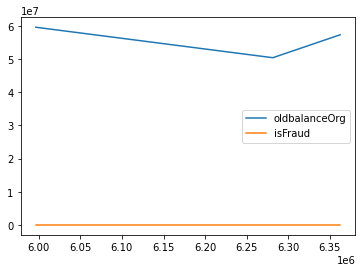

In [18]:
dfFilter = df[df['oldbalanceOrg']>50000000]
dfFilter.loc[:, ['oldbalanceOrg','isFraud']].plot.line()

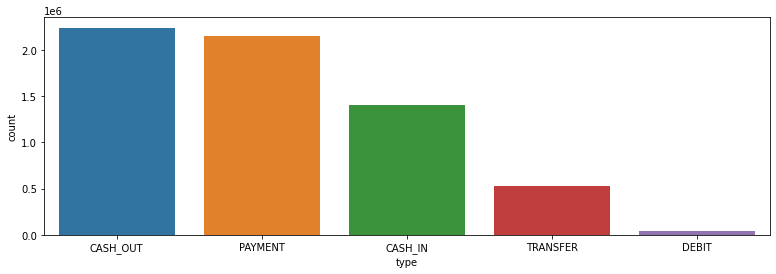

In [24]:
warnings.filterwarnings("ignore")
plt.figure(figsize=(13,4))
sns.countplot(df.type.dropna(), order = df.type.value_counts().index);

In [25]:
df.cov()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,2.025839e+04,1.922922e+06,-4.134891e+06,-4.286311e+06,1.338483e+07,1.353812e+07,0.161374,0.000740
amount,1.922922e+06,3.646448e+11,-4.818002e+09,-1.388012e+10,6.037533e+11,1.019037e+12,1662.713045,11.773104
oldbalanceOrg,-4.134891e+06,-4.818002e+09,8.341946e+12,8.435251e+12,6.503462e+11,4.459983e+11,1053.031482,17.562544
newbalanceOrig,-4.286311e+06,-1.388012e+10,8.435251e+12,8.550060e+12,6.740036e+11,4.494741e+11,-855.454000,17.509156
oldbalanceDest,1.338483e+07,6.037533e+11,6.503462e+11,6.740036e+11,1.155443e+13,1.219639e+13,-718.279794,-2.767921
newbalanceDest,1.353812e+07,1.019037e+12,4.459983e+11,4.494741e+11,1.219639e+13,1.349922e+13,70.622371,-3.080483
isFraud,1.613740e-01,1.662713e+03,1.053031e+03,-8.554540e+02,-7.182798e+02,7.062237e+01,0.001289,0.000003
isFlaggedFraud,7.397338e-04,1.177310e+01,1.756254e+01,1.750916e+01,-2.767921e+00,-3.080483e+00,0.000003,0.000003


In [26]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


   oldbalanceOrg  newbalanceOrig  isFraud
0       170136.0       160296.36        0
1        21249.0        19384.72        0
2          181.0            0.00        1
3          181.0            0.00        1
4        41554.0        29885.86        0


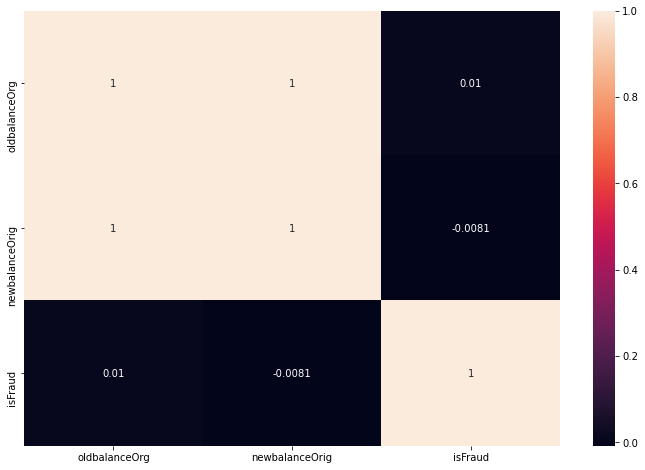

In [32]:
plt.figure(figsize=(12,8))
df1 = df.loc[:, ['oldbalanceOrg','newbalanceOrig','isFraud']]
print(df1.head())

vg_corr = df1.corr()
sns.heatmap(vg_corr,
           xticklabels = vg_corr.columns.values,
           yticklabels = vg_corr.columns.values,
           annot = True);

In [33]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [34]:
df2 = df.drop(columns = ['nameOrig','nameDest','isFlaggedFraud'])
df2.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


In [38]:
df2.shape

(6362620, 8)

In [40]:
file_name = "C:\\Users\\Nehanth\\Desktop\\DSP\\project\\archive\\paysim1.csv"
df2. to_csv(file_name, sep=',', encoding = 'utf-8' )